# Load librabearies

In [4]:
import os
os.chdir("/content/drive/My Drive/Text summarization")
!pip install krovetzstemmer
!pip install py-rouge
from imports import *
from Preprocess import *
from Extractive import *
from rouge_score import *
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

     |████████████████████████████████| 122kB 8.6MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
     |████████████████████████████████| 61kB 4.2MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
#load lemmatizers and stemmers
lemmatizer= WordNetLemmatizer()
stemmer= PorterStemmer()

In [3]:
with open('data/text_summarization_preprocessed_data.pkl', 'rb') as f:
  data = pickle.load(f)

In [4]:
data.head()

,article_text,summary_text,article_character_count,article_word_count,article_sentence_count,summary_character_count,summary_word_count,summary_sentence_count
0,usain bolt rounded off the world championships...,usain bolt wins third gold of world championsh...,3156,307,19,177,19,4
1,the general services administration already un...,the employee in agency's kansas city office is...,6080,546,39,234,21,2
2,a medical doctor in vancouver british columbia...,new: a canadian doctor says she was part of a ...,5715,529,37,315,35,3
3,police arrested another teen thursday the sixt...,another arrest made in gang rape outside calif...,1641,167,13,209,25,3
4,thousands on saturday fled the area in southwe...,humanitarian groups expect 4 000 refugees in o...,3427,309,25,215,20,3


# Summarization

## Sentences scoring

To each article is affected a dictionnary containing the frequency. We star by creating a dictionnary for each article. Each dictionnary contains tokens or n-grams (n=2, 3) and their frequencies in each article (normalized frequencies) 

Example:

In [5]:
#choose 1-grams and bi-grams (1-2 range) with stemming
idx=250
text=data.loc[idx,"article_text"]
ex_freq_dict=text_freq_dict(text, tokenizer='stem', n_gram=2, keep_ponctuation=False)
print(ex_freq_dict.keys())
print(max(ex_freq_dict.values()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
dict_keys(['britain', 'princ', 'harri', 'turn', 'tuesday', 'knowledg', 'entitl', 'part', 'multi', 'million', 'dollar', 'inherit', 'left', 'hi', 'late', 'mother', 'current', 'train', 'becom', 'helicopt', 'pilot', 'british', 'armi', 'wa', 'year', 'old', 'diana', 'princess', 'wale', 'kill', 'car', 'crash', 'pari', 'estat', 'worth', 'paid', 'tax', 'leav', 'around', 'share', 'brother', 'william', 'second', 'line', 'throne', 'press', 'associ', 'report', 'much', 'money', 'thought', 'invest', 'known', 'econom', 'downturn', 'ha', 'affect', 'amount', 'prevent', 'spend', 'lump', 'sum', 'pocket', 'incom', 'gener', 'portion', 'watch', 'birthday', 'windfal', 'j

The frequencies of the stemmed unigrams and bigrams are inferior to 10.

Then, each sentence in each article is scored using the weights of the tokens, n-grams and length of the sentences

An example is shown for the same previous example and sentences are sorted descendingly by their scores



In [6]:
#get the sentences and their scores
sentences, sentences_scores=sentence_scoring(text, tokenizer='stem', n_gram=2, keep_ponctuation=False)
pd.DataFrame.from_dict({"Sentence": sentences_scores.keys(), "Score":sentences_scores.values() }).sort_values(by=["Score"], axis=0, ascending=False)

,Sentence,Score
1,prince harry is currently training to become a...,0.329412
11,a spokesman for the prince told cnn: prince ha...,0.248387
2,harry was just 12 years old when diana princes...,0.244444
5,watch more about prince harry's birthday windf...,0.229787
0,britain's prince harry turned 25 tuesday in th...,0.225806
4,both princes are prevented from spending the l...,0.203226
8,he received a promotion to the rank of lieuten...,0.179310
13,in a well-publicized gaffe in 2005 harry apolo...,0.176190
6,there had been fears that harry who is third i...,0.173684
16,what's done is done.,0.166667


## Sentences selection

In [7]:
#summarizatin by setting a threshold: sentences with score >= factor*threshold
summary, count=sum_by_threshold(text,factor=1,tokenizer='stem', n_gram=2)
summary

"britain's prince harry turned 25 tuesday in the knowledge that he is now entitled to part of the multi-million dollar inheritance left to him by his late mother. prince harry is currently training to become a helicopter pilot with the british army. harry was just 12 years old when diana princess of wales was killed in a car crash in paris in 1997. his mother left an estate worth â£21 million $35 million but more than â£8 million $13.31 million was paid in inheritance tax leaving around â£13 million $21.6 million to be shared between harry and his brother william who is second in line to the throne the british press association reported. both princes are prevented from spending the lump sum of their inheritance until they turn 30. but harry will pocket all income generated by his portion of the estate around â£300 000 $500 000 a year. watch more about prince harry's birthday windfall â» prince harry joined the british army in 2006 and served in afghanistan for more than two months from

In [8]:
count

7

The higher the factor, the more selective the summrization is

Another technique is to set the desired length of summary

In [9]:
#summarizatin by setting count2 sentences with the highest scores
count2= data.loc[idx,"summary_sentence_count"]
summary2, count2=sum_by_count(text,count2,tokenizer='stem', n_gram=2)
summary2

'prince harry is currently training to become a helicopter pilot with the british army. harry was just 12 years old when diana princess of wales was killed in a car crash in paris in 1997. his mother left an estate worth â£21 million $35 million but more than â£8 million $13.31 million was paid in inheritance tax leaving around â£13 million $21.6 million to be shared between harry and his brother william who is second in line to the throne the british press association reported. a spokesman for the prince told cnn: prince harry has apologized for his comments and has been subjected to normal army disciplinary procedures'

In [10]:
count2

3

In [11]:
#view an article and summaries
check_summary(text, data.loc[idx,"summary_text"], summary, summary2,width=100)

ARTICLE:
britain's prince harry turned 25 tuesday in the knowledge that he is now entitled to part of the
multi-million dollar inheritance left to him by his late mother. prince harry is currently training
to become a helicopter pilot with the british army. harry was just 12 years old when diana princess
of wales was killed in a car crash in paris in 1997. his mother left an estate worth â£21 million
$35 million but more than â£8 million $13.31 million was paid in inheritance tax leaving around â£13
million $21.6 million to be shared between harry and his brother william who is second in line to
the throne the british press association reported. much of that money is thought to have been
invested but it is not known if the economic downturn has affected the amount. both princes are
prevented from spending the lump sum of their inheritance until they turn 30. but harry will pocket
all income generated by his portion of the estate around â£300 000 $500 000 a year. watch more about
prince

In [12]:
n_predictions=10
random.seed(50)
index = pd.Index(random.sample(list(data.index), n_predictions))
df=data[["article_text", "summary_text", "article_sentence_count", "summary_sentence_count"]]

## Apply selective techniques 

In [13]:
#test on 10 articles
test_df1= predict_summary(df,index, factor=1, n_gram=2, token_type="stem")
test_df2= predict_summary2(df,index, n_gram=2, token_type="stem")

In [14]:
test_df1

,Summarization by threshold_2-gram_stem_1-factor
id,
65213,margaret thatcher one of the seminal political...
34887,a campaign rally for ecuador's president turne...
47722,these may soon be 10 of the most popular desti...
83546,al qaeda in the arabian peninsula commander na...
31782,august reiger was supposed to reunite with his...
62019,oscar pistorius killed reeva steenkamp on vale...
43260,as a candidate barack obama promoted hybrid ca...
11165,in spite of ever rising tuition and ballooning...
70581,nearly 100 former chilean soldiers and secret ...


In [15]:
test_df2

,Summarization by count2-gram_stem
id,
65213,opinion: why thatcher made so many enemies she...
34887,at least four others were injured at the event...
47722,these may soon be 10 of the most popular desti...
83546,al qaeda's franchise in syria al-nusra front i...
31782,they're confident he is not up there stuck som...
62019,the defense is likely to rely on three types o...
43260,auto enthusiasts have panned the design of the...
11165,that may no longer be the case. in the future ...
70581,nearly 100 former chilean soldiers and secret ...


In [16]:
#make sure the summarization function has no error
test1=sum_by_threshold(df.loc[65213,"article_text"],factor=1,tokenizer='stem', n_gram=2)[0]
test2=sum_by_count(df.loc[65213,"article_text"],data.loc[65213,"summary_sentence_count"],tokenizer='stem', n_gram=2)[0]
assert(test1==test_df1.loc[65213,"Summarization by threshold_2-gram_stem_1-factor"])
assert(test2==test_df2.loc[65213,"Summarization by count2-gram_stem"])

In [17]:
merged_test=pd.merge(test_df1, test_df2, how='inner',on=['id'] )
merged_test

,Summarization by threshold_2-gram_stem_1-factor,Summarization by count2-gram_stem
id,,
65213,margaret thatcher one of the seminal political...,opinion: why thatcher made so many enemies she...
34887,a campaign rally for ecuador's president turne...,at least four others were injured at the event...
47722,these may soon be 10 of the most popular desti...,these may soon be 10 of the most popular desti...
83546,al qaeda in the arabian peninsula commander na...,al qaeda's franchise in syria al-nusra front i...
31782,august reiger was supposed to reunite with his...,they're confident he is not up there stuck som...
62019,oscar pistorius killed reeva steenkamp on vale...,the defense is likely to rely on three types o...
43260,as a candidate barack obama promoted hybrid ca...,auto enthusiasts have panned the design of the...
11165,in spite of ever rising tuition and ballooning...,that may no longer be the case. in the future ...
70581,nearly 100 former chilean soldiers and secret ...,nearly 100 former chilean soldiers and secret ...


The summarization tasks work well without errors.
\
Since 90000 articles takes too much to summarize, we choose only 2000 articles to visualize the results.
\
The summarization will be tested on both types of summarizers with different parameters: 
1. Threshold factor: in case of threshold summarization: select sentences with score superior to $factor\times score mean$
2. N-gram: In sentence scoring consider only n-grams with $n\leq N$ 
3. Token type: whether to apply Lemmatizaion ot Stemming to each term in the dictionnary

In [28]:
n_predictions=2000
random.seed(50)
index = pd.Index(random.sample(list(data.index), n_predictions))
#iterate through different parameter sets for n_predictions examples
n_gram_list=[1,2,3]
token_type_list = ['word','stem', 'lemma']
factor_list = [1, 1.1, 1.2]
sample_data=data[["article_text", "summary_text", "article_sentence_count", "summary_sentence_count"]]
sample_data.index.name = 'id'
t0 = time()
for n_gram in n_gram_list:
  for token in token_type_list:
    d2=predict_summary2(sample_data,index, n_gram=n_gram, token_type=token)
    sample_data=pd.merge(sample_data, d2, how='inner',on=['id'] )
    for factor in factor_list:
      d1=predict_summary(sample_data,index, factor=factor, n_gram=n_gram, token_type=token)
      sample_data=pd.merge(sample_data, d1, how='inner',on=['id'] )
      print("n-gram="+str(n_gram)+"; token="+token+"; factor="+str(factor)+"done!") 
      print('Time taken {:.2f} minutes'.format((time() - t0)/60))
      print("\n")

n-gram=1; token=word; factor=1done!
Time taken 1.51 minutes


n-gram=1; token=word; factor=1.1done!
Time taken 2.26 minutes


n-gram=1; token=word; factor=1.2done!
Time taken 3.02 minutes


n-gram=1; token=stem; factor=1done!
Time taken 7.04 minutes


n-gram=1; token=stem; factor=1.1done!
Time taken 9.03 minutes


n-gram=1; token=stem; factor=1.2done!
Time taken 11.00 minutes


n-gram=1; token=lemma; factor=1done!
Time taken 13.11 minutes


n-gram=1; token=lemma; factor=1.1done!
Time taken 14.23 minutes


n-gram=1; token=lemma; factor=1.2done!
Time taken 15.28 minutes


n-gram=2; token=word; factor=1done!
Time taken 19.73 minutes


n-gram=2; token=word; factor=1.1done!
Time taken 22.00 minutes


n-gram=2; token=word; factor=1.2done!
Time taken 24.29 minutes


n-gram=2; token=stem; factor=1done!
Time taken 36.10 minutes


n-gram=2; token=stem; factor=1.1done!
Time taken 41.84 minutes


n-gram=2; token=stem; factor=1.2done!
Time taken 47.66 minutes


n-gram=2; token=lemma; factor=1done!


Total time taken is 118 minutes

# Testing the summarizers

In [6]:
#save the obtained summaries
#sample_data.to_pickle("data/sample_data_summarized.pkl")
with open('data/sample_data_summarized.pkl', 'rb') as f:
    sample_data_summarized = pickle.load(f)
sample_data_summarized.columns

Index(['article_text', 'summary_text', 'article_sentence_count',
       'summary_sentence_count', 'Summarization by count1-gram_word',
       'Summarization by threshold_1-gram_word_1-factor',
       'Summarization by threshold_1-gram_word_1.1-factor',
       'Summarization by threshold_1-gram_word_1.2-factor',
       'Summarization by count1-gram_stem',
       'Summarization by threshold_1-gram_stem_1-factor',
       'Summarization by threshold_1-gram_stem_1.1-factor',
       'Summarization by threshold_1-gram_stem_1.2-factor',
       'Summarization by count1-gram_lemma',
       'Summarization by threshold_1-gram_lemma_1-factor',
       'Summarization by threshold_1-gram_lemma_1.1-factor',
       'Summarization by threshold_1-gram_lemma_1.2-factor',
       'Summarization by count2-gram_word',
       'Summarization by threshold_2-gram_word_1-factor',
       'Summarization by threshold_2-gram_word_1.1-factor',
       'Summarization by threshold_2-gram_word_1.2-factor',
       'Summariza

Testing th results will be done by the **rouge scores**. It is a method that calculates precision, recall and F1-score for hypothetsis summaries and reference ones using overlapping terms, terms relevant to hypothesis summaries and terms relevant to reference summaries.

In [34]:
#example
hyp = 'the cat was found under the bed' 
ref = 'the cat was under the bed'

evaluator = rouge.Rouge(metrics = ['rouge-n'],
                           max_n = 1,
                           limit_length = True,
                           length_limit = 100,
                           length_limit_type = 'words',
                           alpha = 0.5, # Default F1_score
                           stemming=True)
evaluator.get_scores(hyp, ref)

{'rouge-1': {'f': 0.923076923076923, 'p': 0.8571428571428571, 'r': 1.0}}

## Calculate scores

In [31]:
#calculate the rouge scores for each summarizer and store the results
scores_data=R_score(sample_data_summarized, max_n=1, alpha=0.5, score="F1")
scores_data.to_pickle("data/scores_data.pkl")
scores_data.shape

(2000, 36)

In [7]:
with open('data/scores_data.pkl', 'rb') as f:
    scores_data = pickle.load(f)

We choose some column which characterises certain sets of parameters values and we will plot their distributions on rouge-scores.

In [8]:
#generate columns_names from parameters
n_gram_list=[1,2,3]
token_type_list=['stem','lemma']
sum_types=['count', 'threshold']
factor_list=[1,1.2]
columns_names=[]
for sum_type in sum_types:
  for n_gram in n_gram_list:
    for token_type in token_type_list:
      for factor in factor_list:
        columns_names.append(generate_column_names(sum_type, n_gram, token_type, factor)[1])
columns_names=list(set(columns_names)) #remove redundencies in count summarizers

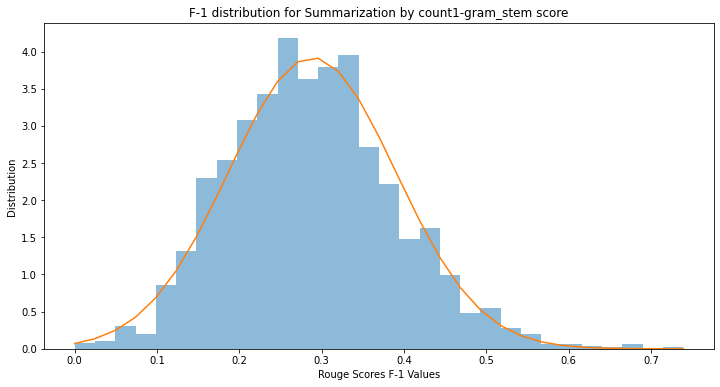

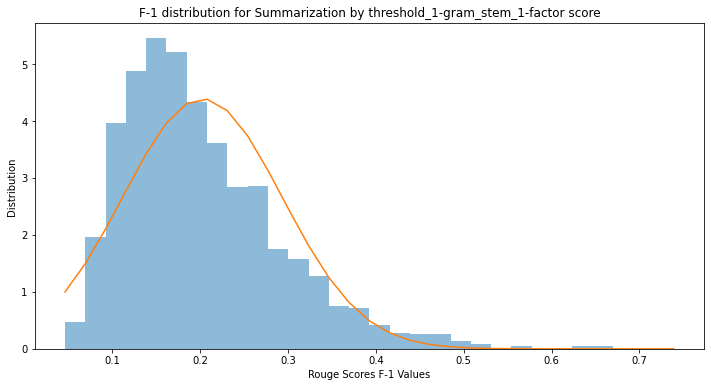

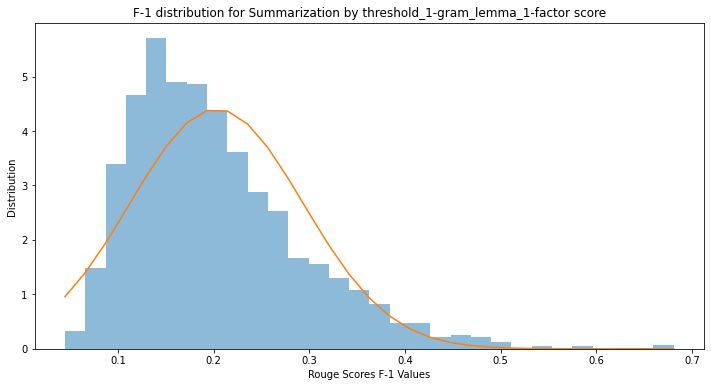

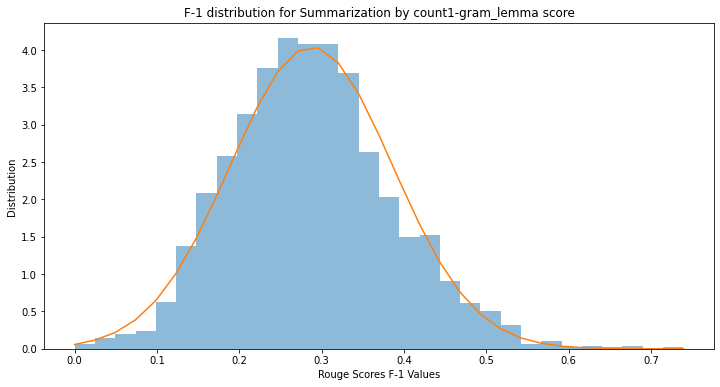

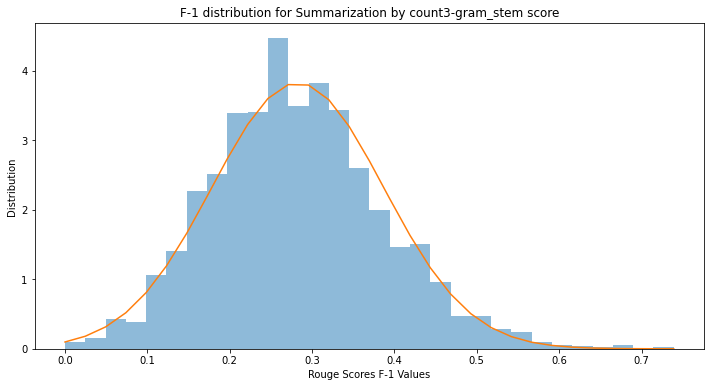

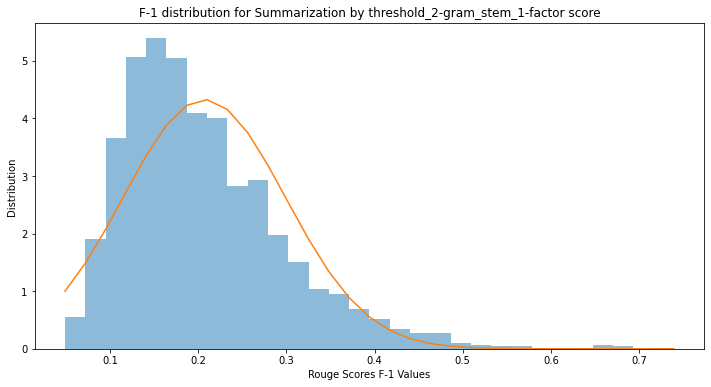

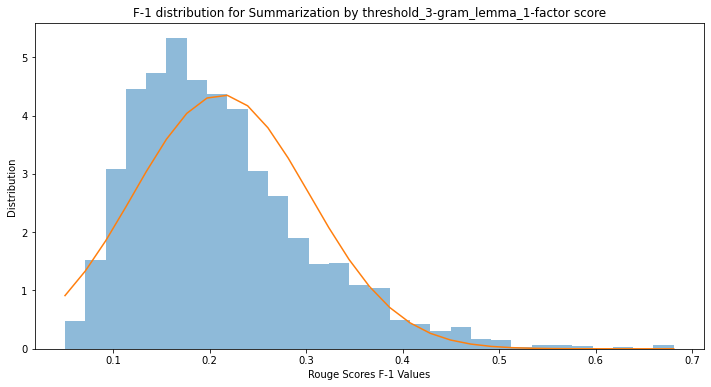

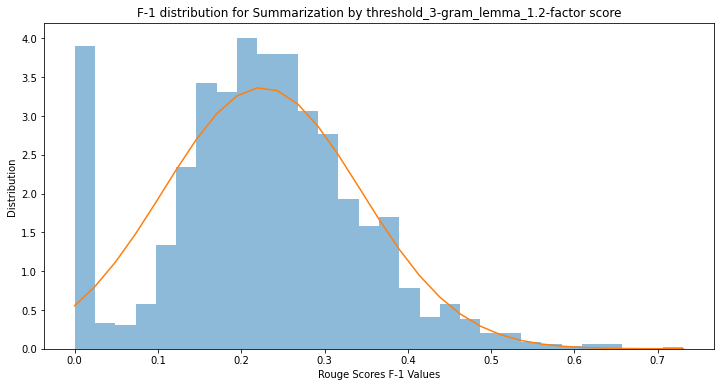

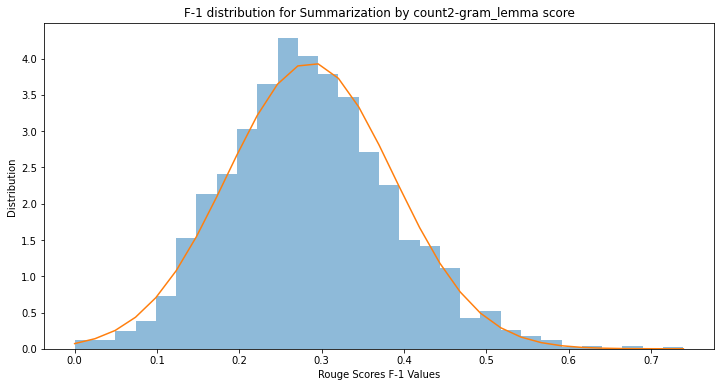

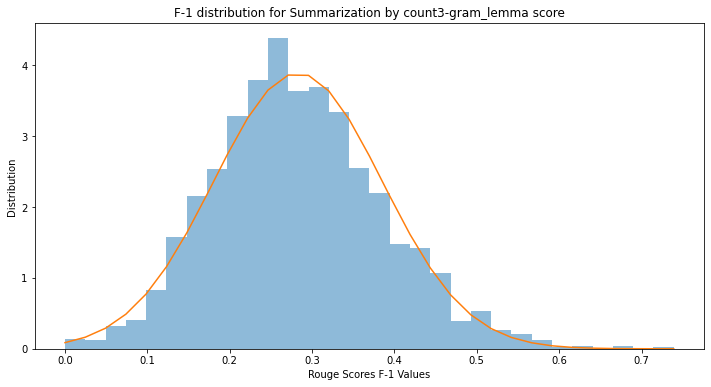

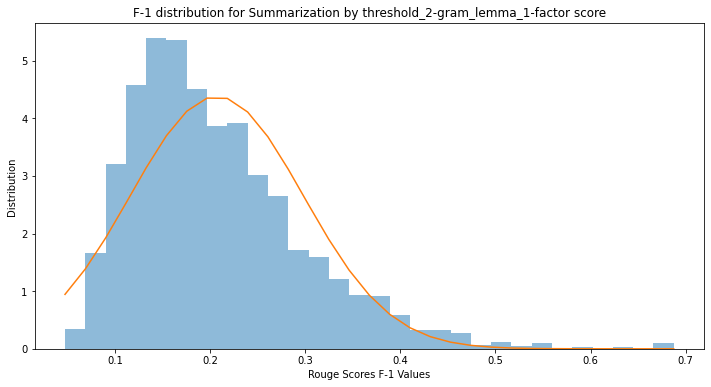

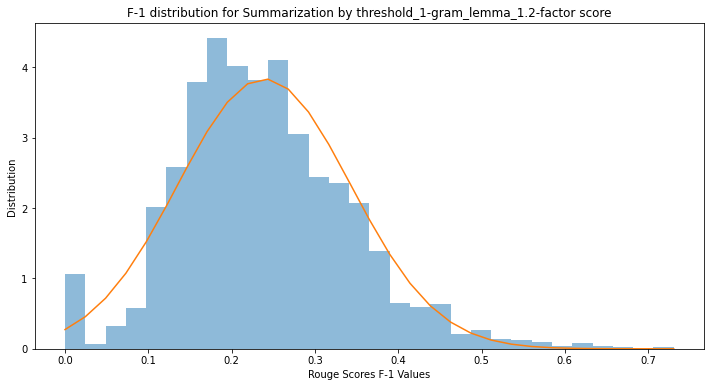

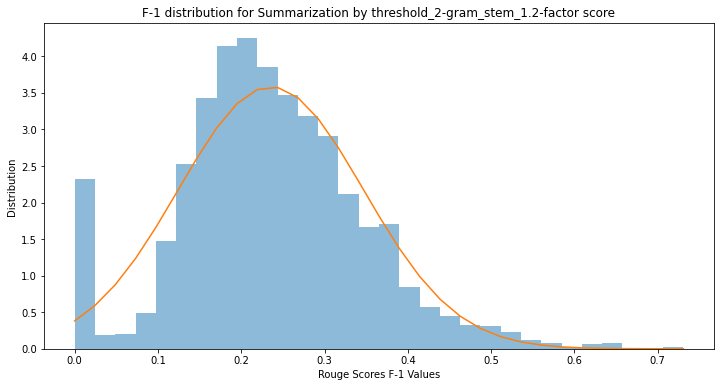

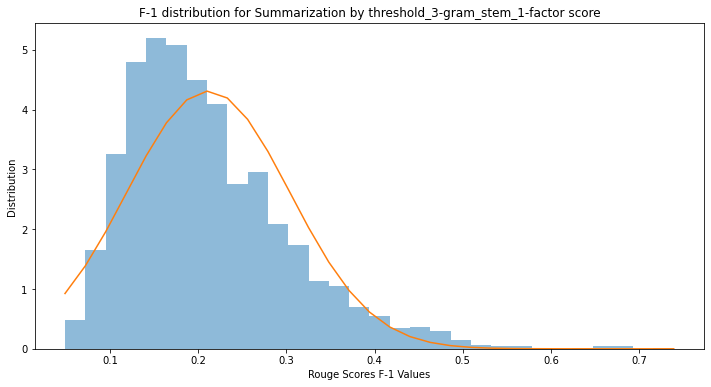

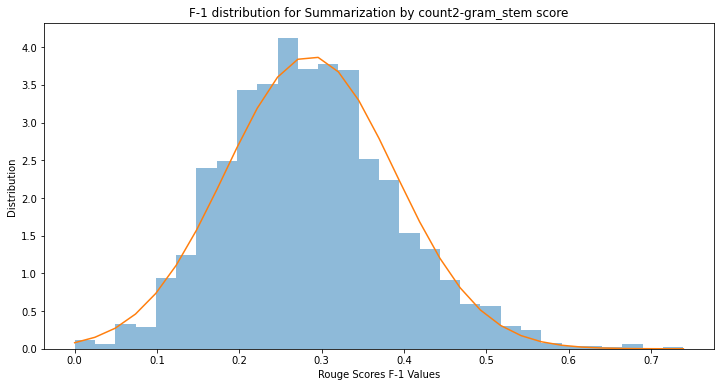

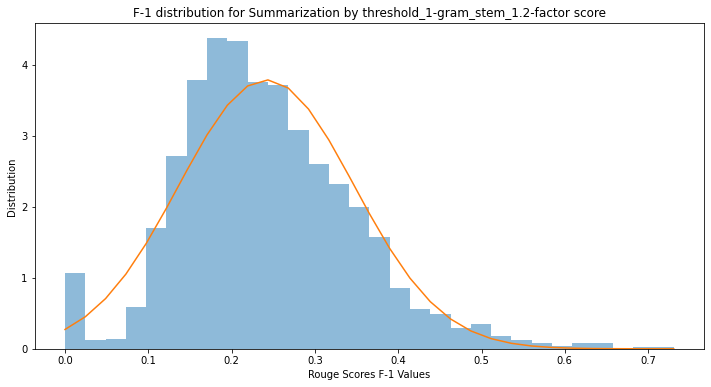

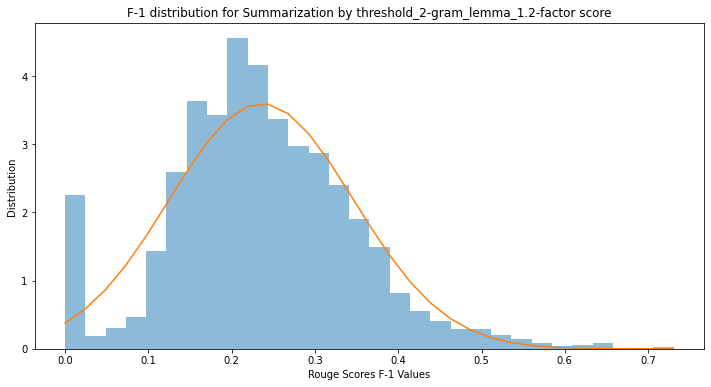

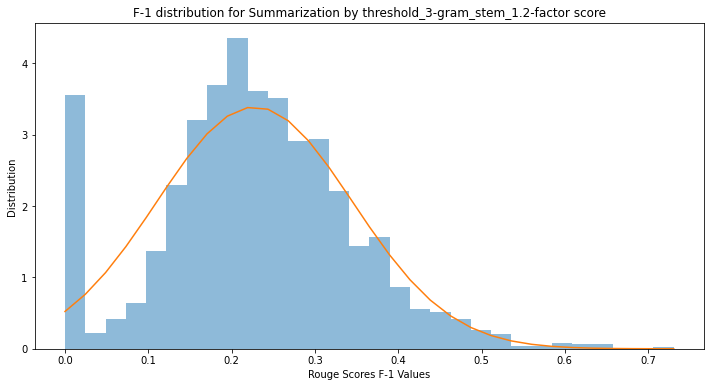

In [9]:
for col_name in columns_names:
  plot_distribution(scores_data, col_name, n_bins=30)

The by count method summarizers haves scores distribution that could be approximated by a normal distribution.
The by threshold method summarizers have scores distribution that could be approximaayed by a beta distribution

In [10]:
# limit parameters to avoid large results
n_gram_list=[1,2,3]
token_type_list=['stem','lemma']
sum_types=['count', 'threshold']
factor_list=[1,1.2]

## Summarizers selection

In [11]:
stat_data=scores_data[columns_names].describe()
stat_data=stat_data.transpose()
#stat_data.index
stat_data

,count,mean,std,min,25%,50%,75%,max
Summarization by count1-gram_stem score,2000.0,0.288482,0.101797,0.000000,0.216216,0.285714,0.351852,0.739130
Summarization by threshold_1-gram_stem_1-factor score,2000.0,0.202452,0.090917,0.046012,0.136514,0.183601,0.251490,0.739130
Summarization by threshold_1-gram_lemma_1-factor score,2000.0,0.202910,0.090671,0.044510,0.137245,0.184924,0.251016,0.680851
Summarization by count1-gram_lemma score,2000.0,0.287513,0.098658,0.000000,0.218608,0.283333,0.347161,0.739130
Summarization by count3-gram_stem score,2000.0,0.282606,0.104441,0.000000,0.210526,0.276369,0.346667,0.739130
Summarization by threshold_2-gram_stem_1-factor score,2000.0,0.207020,0.092261,0.049155,0.139965,0.187689,0.256528,0.739130
Summarization by threshold_3-gram_lemma_1-factor score,2000.0,0.211937,0.091602,0.050000,0.144353,0.195440,0.259647,0.680851
Summarization by threshold_3-gram_lemma_1.2-factor score,2000.0,0.225007,0.118538,0.000000,0.157436,0.227150,0.296441,0.730769
Summarization by count2-gram_lemma score,2000.0,0.286311,0.101167,0.000000,0.216216,0.281690,0.350091,0.739130
Summarization by count3-gram_lemma score,2000.0,0.282875,0.102612,0.000000,0.210526,0.277575,0.346939,0.739130


In [12]:
#extract params from column names
for name in stat_data.index:
  stat_data=get_params(stat_data, name)
#create features = params
#calculate statistical summary
stat_data=stat_data.set_index(["type","factor","n-gram","token"])[["mean","75%","std"]].sort_values(by=['mean', '75%'], ascending=False)
stat_data

mean       75%       std
type      factor n-gram token                              
count     NaN    1.0    stem   0.288482  0.351852  0.101797
                        lemma  0.287513  0.347161  0.098658
                 2.0    lemma  0.286311  0.350091  0.101167
                        stem   0.286085  0.348929  0.102803
                 3.0    lemma  0.282875  0.346939  0.102612
                        stem   0.282606  0.346667  0.104441
threshold 1.2    1.0    stem   0.241784  0.303115  0.105417
                        lemma  0.239094  0.302326  0.104068
                 2.0    lemma  0.235662  0.303030  0.110911
                        stem   0.235585  0.301075  0.111324
                 3.0    stem   0.227656  0.300000  0.117788
                        lemma  0.225007  0.296441  0.118538
          1.0    3.0    lemma  0.211937  0.259647  0.091602
                        stem   0.211535  0.261331  0.092572
                 2.0    lemma  0.207060  0.255632  0.091146
                        stem   0.207020  0.256528  0.092261
                 1.0    lemma  0.202910  0.251016  0.090671
                        stem   0.202452  0.251490  0.090917

1. The scores obtained from by-count summarizers have higher score means. It explained by the fact that the count method for summarizing keeps the same number of sentences, whereas the threshold method may result in a different number of sentences for the threshold method (superior or or inferior to the refernece summary depending on the threshold factor) which can negatively impact the F1- score in both cases.
2. The "75%" column indicates the score that limits the $\frac{3}{4}$ of the scores. The higher this score, the more the scores tend to be in overall higher. As the previous plots have shown, the approximated beta distribution (for the threshold method scores) shows a curve with a peak which tends to deviate more to the left (lower values).

We will choose a method for each type of summarization. 

In [13]:
#optimal_count_sum_params=[1, 'stem']
#optimal_threshold_sum_params=[1, 'stem', 1.0]
optimal_count_sum_col, optimal_count_sum_score_col=generate_column_names('count', 1, 'stem', 0)
optimal_threshold_sum_col, optimal_threshold_sum_score_col=generate_column_names('threshold', 1, 'stem', 1)

## Low score analysis

Let us check the reasons behin the low scores for each summarizer. We will make 3 assumptions:
1. The score tends to be lower when the number of sentences of the article to summarize is higher.
2. The score is lower when the difference between the number of sentences of the hypothesis summary and reference summary is higher (this assumption is only valid for the threshold summarizer)

3. The R2-score is proportionate to the number of hypothesis summary sentences

Let us check the validity of the assumptions from both optimal summarizers

### Number of article sentences - R2-score

In [14]:
#make sure there are noo empty article (len (article sentences) >0))
assert(min(sample_data_summarized["article_sentence_count"]))>0
index= sample_data_summarized.index
data1=pd.DataFrame()
for i in index:
  data1.loc[i,"article_sentence_count"]=sample_data_summarized.loc[i,"article_sentence_count"]
  data1.loc[i,"Count summarizer: R2-score"]=scores_data.loc[i, optimal_count_sum_score_col]
  data1.loc[i,"Threshold summarizer: R2-score"]=scores_data.loc[i, optimal_threshold_sum_score_col]
  

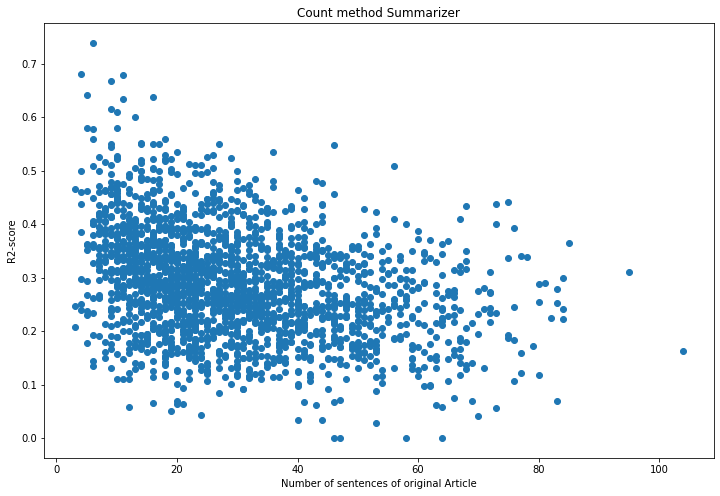

In [15]:
#count method suammrizer 
plt.figure(figsize=(12, 8))
plt.scatter(data1["article_sentence_count"], data1["Count summarizer: R2-score"])
plt.xlabel("Number of sentences of original Article")
plt.ylabel("R2-score")
plt.title("Count method Summarizer")
plt.show()

There is no clear linearity propotion, but there is a tendancy to find articles summaries with reatively high R2-scores for a low number of sentences for the articles, and articles summaries with reatively low R2-scores for a higher number of sentences for the articles.

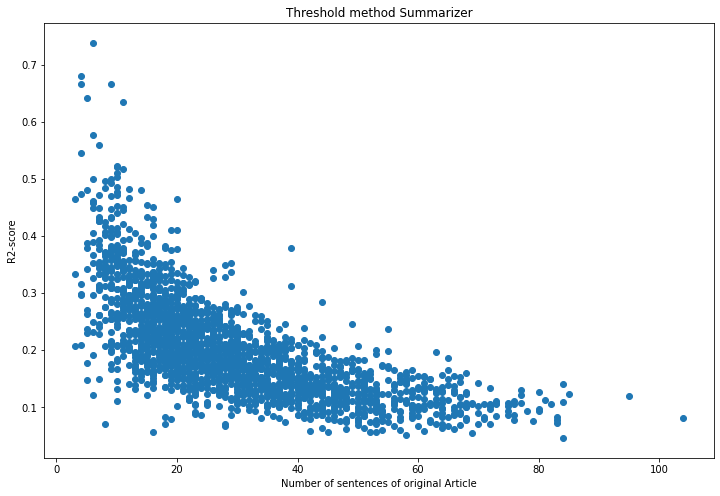

In [16]:
#threshold method summarizer
plt.figure(figsize=(12, 8))
plt.scatter(data1["article_sentence_count"], data1["Threshold summarizer: R2-score"])
plt.xlabel("Number of sentences of original Article")
plt.ylabel("R2-score")
plt.title("Threshold method Summarizer")
plt.show()

It is more evident for the threshold summarizer to conclue the relation between the number of sentences and R2-score.
The curve is close to a decreasing exponential.

### (Number of hypothesis summary sentences - Number of reference summary sentences) - R2-score

In [20]:
data2=pd.DataFrame()
#remove articles with hypothesis empty summaries
for i in index:
  data2.loc[i, "Threshold summarizer sentence count"]=sentence_tokenizer(sample_data_summarized.loc[i, optimal_threshold_sum_col])[1]
index2 =[i for i in index if  (data2.loc[i, "Threshold summarizer sentence count"]>0)]
for i in index2:
  data2.loc[i,"Summary counts difference"]=sample_data_summarized.loc[i,"summary_sentence_count"]-data2.loc[i, "Threshold summarizer sentence count"]
  data2.loc[i,"Summary counts fraction"]=data2.loc[i, "Threshold summarizer sentence count"]/sample_data_summarized.loc[i,"summary_sentence_count"]
  data2.loc[i,"Threshold summarizer: R2-score"]=scores_data.loc[i, optimal_threshold_sum_score_col]

In [28]:
min(data2["Threshold summarizer sentence count"]/sample_data_summarized["summary_sentence_count"])

0.25

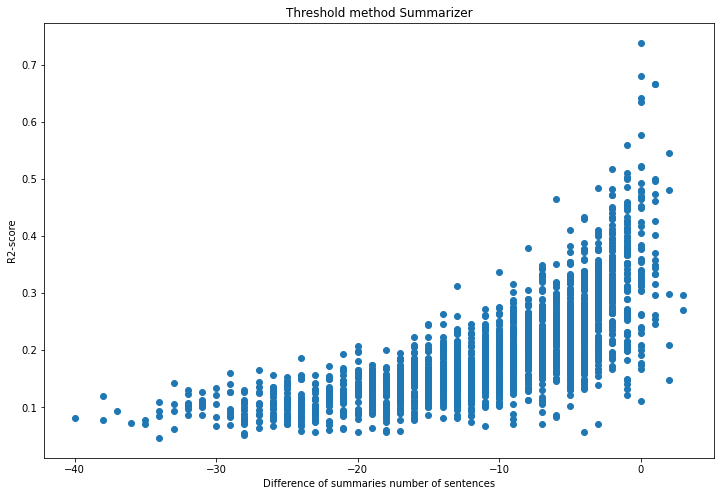

In [21]:
#thereshold method suammrizer 
plt.figure(figsize=(12, 8))
plt.scatter(data2["Summary counts difference"], data2["Threshold summarizer: R2-score"])
plt.xlabel("Difference of summaries number of sentences")
plt.ylabel("R2-score")
plt.title("Threshold method Summarizer")
plt.show()

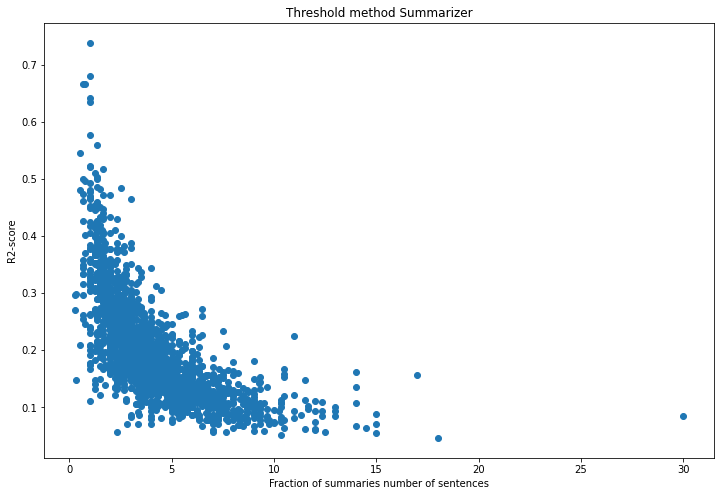

In [22]:
#thereshold method suammrizer 
plt.figure(figsize=(12, 8))
plt.scatter(data2["Summary counts fraction"], data2["Threshold summarizer: R2-score"])
plt.xlabel("Fraction of summaries number of sentences")
plt.ylabel("R2-score")
plt.title("Threshold method Summarizer")
plt.show()

The difference between the original summary sentences count and the hypothesis summary (obtained by threshold method) sentences count shows that R2-score has tendancy to be higher when the difference is closer to 0 or. Only a few articles have the hypothesis summary with a larger number of sentences.

The same goes for the fraction plot. The more the number of sentences of the original summary is superior to the number of sentences in the hypothesis summary, the more the R2 score tends to be higher.

###  Number of hypothesis summary sentences - The R2-score

In [34]:
data3=pd.DataFrame()
#count sentences for the count summarizer
for i in index:
  data3.loc[i, "Count summarizer sentence count"]=sentence_tokenizer(sample_data_summarized.loc[i, optimal_count_sum_col])[1]
  data3.loc[i,"Count summarizer: R2-score"]=scores_data.loc[i, optimal_count_sum_score_col]

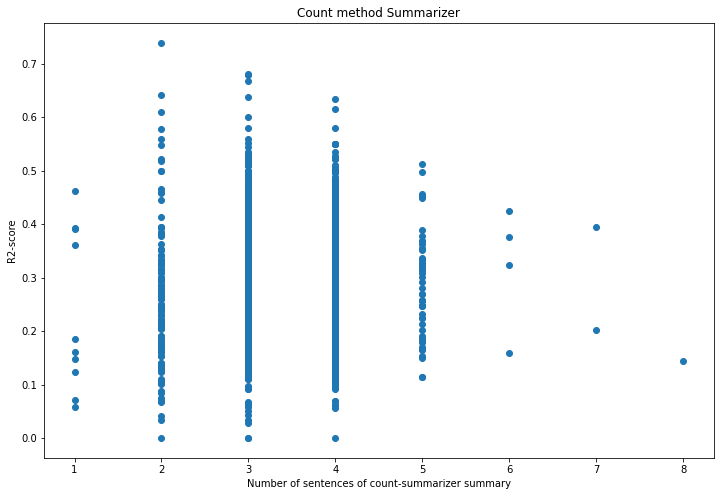

In [35]:
#count method summarizer
plt.figure(figsize=(12, 8))
plt.scatter(data3["Count summarizer sentence count"], data3["Count summarizer: R2-score"])
plt.xlabel("Number of sentences of count-summarizer summary")
plt.ylabel("R2-score")
plt.title("Count method Summarizer")
plt.show()

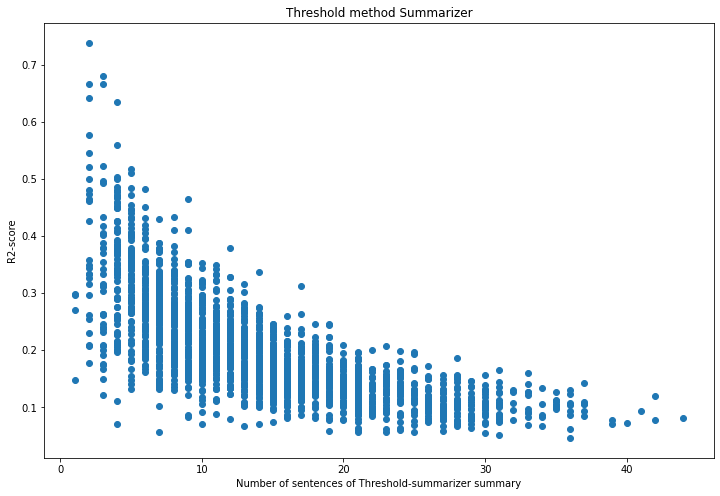

In [37]:
#thereshold method suammrizer 
plt.figure(figsize=(12, 8))
plt.scatter(data2[ "Threshold summarizer sentence count"], data2["Threshold summarizer: R2-score"])
plt.xlabel("Number of sentences of Threshold-summarizer summary")
plt.ylabel("R2-score")
plt.title("Threshold method Summarizer")
plt.show()

For the count summarizer, the number of sentencs is already fixed. That's why it does not really affect the R-2 score.

As for the threshold summarizer, The less the number of sentences in the summar, the more the R-2 score tends to be higher

# Conclusion

*In general, extractive summarizers lack meaning accuracy and tend to drop important sentences apart from the fact that ther isn't a very accurate scoring technique*. 